# Lab 12 – Hyperparameter tuning

Name 1: Anh Kieu  
Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2021  
Instructor: Brian King  

# Objectives

This lab will introduce the student to understanding hyperparameters, and getting a sense of how to tune them. Specifically, the objectives are as follows:

- Understand the impact of hyperparameters with model induction and performance
- Learn to use the GridSearchCV class to find good parameters for your model

--- 
# Background
You were introduced to Keras deep learning framework in the last lab. You also learned how to use the Keras wrapper class, KerasClassifier, so that you could continue to use the wonderful scikit-learn framework for data mining and machine learning, leveraging Keras within the environment you know. You also learned that there are an enormous number of parameters to consider to get a good result! Yeah, you could do it manually by creating multiple loops to evaluate different model parameters, or you could use the scikit-learn's framework to do this.

## What is hyperparameter tuning
The real focus of this lab is to learn how to use the `scikit-learn` framework to assist you with hyperparameter tuning.  Every machine learning model has parameters that control model induction. They are generally referred to hyperparamters, and you need to optimize them for your given problem. The parameters usually come down to figuring out how to control the complexity of your model such that it is able to learn from your data, but not overfit. (Recall our bias vs. variance tradeoff discussion!) Understanding this is critical. Understanding how to address it is even better, and is an important skill to learn. You will in this lab.

Generally, there are two approaches you can take to hyperparameter tuning. You could write an enormous number of loops yourself to track the model parameters you are experimenting with and keep track of the model performances coming from each parameter set. Or, you can use a grid search framework to search for the parameters. That's the purpose of `scikit-learn`'s `GridSearchCV` class.

>WARNING: Hyperparameter tuning can use a LOT of computational resources, both CPU and memory! Depending on how you set up your test, and the complexity of the model being evaluated, you could be waiting days for a result! So, ALWAYS start with a simple setup (small data sample, limited number of parameters to test) before you run an exhaustive grid search for your optimal parameters!

## Preparing for this lab

Some of this lab is modeled after some code given in a few different web sites, and you might get more out of the lab by taking a few minutes to skim through these pages, just to understand the framework you are going to be using to perform a grid-search for optimal hyperparameters. You might even want to just keep these pages open in your browser.

- First, the most important page you'll need is the reference to GridSearchCV: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- The best example code can be found right on the scikit-learn site:
    - https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html  
- The user guide has an exhaustive writeup covering the topic of hyper-parameter tuning. This has a *lot* of good information, some of which is far more advanced than anything you need at this time:
    - https://scikit-learn.org/stable/modules/grid_search.html
- The following page illustrates a bit simpler code to get you started, however, note that it uses the `Sequential` model, vs. using the *Functional API*:
    - https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/. 

That's it!

In [1]:
# This magic command just allows the autocomplete <TAB> 
# feature to work properly.
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

#import tensorflow as tf
#from tensorflow import keras
import keras
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras.models import Input, Model
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam

In [3]:
# print(tf.__version__)

In [4]:
print(keras.__version__)

2.4.3


***
# The classic Wine dataset
There have been *many* datasets appearing over the past 15 years or so that attempt to try and capture numerous objective measures to characterize wine. An often-used dataset for classification exercises is the infamous wine dataset from the early 1990s. Not quite as popular as iris, but pretty close. It's a bit more complex than iris, with 13 variables and 1 target multi-class variable, an no model has obtained near 100% accuracy on validation. However, we can usually get in the mid 90s on the best models.

### Reading in the wine data

Open the following page:
* https://archive.ics.uci.edu/ml/datasets/wine 

This page will give you the data and the information you need to start this lab.  (If you prefer, it is also one of the built-in datasets available in `sklearn.datasets` package (see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html ). Either way, you need to first convert this to a pandas data frame. 

The following code will read in the data from the UCI machine learning site, as a data frame in its raw form:

```
names = ["target","alcohol","malic_acid","ash","alcalinity","Mg","tot_phenols","flavanoids",
         "non_flav_phenols","proanthocyanins","color_intensity",
         "hue","OD","proline"]

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=names)
```

This is the first lab that is provided as an unanswered .ipynb file to help you focus on the work and not get caught up in dealing with formatting. You've got the formatting down, so focus on really absorbing this material. This lab is a culminating experience that represents the type of analyses you will do if you do this in "the real world." And likewise, this is a bit more "hands off" than the previous lab was. On the bright side, I chose a dataset that has  many, many published examples already that demonstrate reading and modeling these exact data.

>NOTE: As usual, with all of the popular datasets, there are many examples available online that can help you understand the data, clean the data, generate EDA plots to understand the distributions, etc. I encourage you to search for code to generate some reasonable plots with these data! (And, include all URLs that you use!)

***
**1)** Read in the wine data frame using the code given above. It also gives you the names of the variables, which should be the same as the data information given on the UCI web page. Store your result as `df_wine`.

In [5]:
names = ["target","alcohol","malic_acid","ash","alcalinity","Mg","tot_phenols","flavanoids",
         "non_flav_phenols","proanthocyanins","color_intensity",
         "hue","OD","proline"]
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=names)

***
**2)** Prepare your data. Over multiple code cells, minimally, you should be reporting:
-	`shape`, `info()`, etc
-	Cast the type of each variables into its most correct type, paying special attention to the target class (which for these data sis called `target`, and should be a categorical variable). Fortunately, these are already going to read in mostly correct.
-	Report on any missing data. (There shouldn't be any.)
-	Show the `head()` of the data frame



##### Basic report:

In [6]:
df_wine.shape

(178, 14)

In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target            178 non-null    int64  
 1   alcohol           178 non-null    float64
 2   malic_acid        178 non-null    float64
 3   ash               178 non-null    float64
 4   alcalinity        178 non-null    float64
 5   Mg                178 non-null    int64  
 6   tot_phenols       178 non-null    float64
 7   flavanoids        178 non-null    float64
 8   non_flav_phenols  178 non-null    float64
 9   proanthocyanins   178 non-null    float64
 10  color_intensity   178 non-null    float64
 11  hue               178 non-null    float64
 12  OD                178 non-null    float64
 13  proline           178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


##### Casting variables:

In [8]:
# turn target into categorical
df_wine.target = pd.Categorical(df_wine.target)

In [9]:
# down cast if possible
for column in df_wine.columns[1:]:
    if column == 'Mg' or column =='proline':
        df_wine[column] = pd.to_numeric(df_wine[column], downcast = 'unsigned') # from describe I know that it is unsigned
    else:
        df_wine[column] = pd.to_numeric(df_wine[column], downcast = 'float')

##### After casting

In [10]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   target            178 non-null    category
 1   alcohol           178 non-null    float32 
 2   malic_acid        178 non-null    float32 
 3   ash               178 non-null    float32 
 4   alcalinity        178 non-null    float32 
 5   Mg                178 non-null    uint8   
 6   tot_phenols       178 non-null    float32 
 7   flavanoids        178 non-null    float32 
 8   non_flav_phenols  178 non-null    float32 
 9   proanthocyanins   178 non-null    float32 
 10  color_intensity   178 non-null    float32 
 11  hue               178 non-null    float32 
 12  OD                178 non-null    float32 
 13  proline           178 non-null    uint16  
dtypes: category(1), float32(11), uint16(1), uint8(1)
memory usage: 8.6 KB


##### Report N/A values

In [11]:
df_wine.isna().sum()

target              0
alcohol             0
malic_acid          0
ash                 0
alcalinity          0
Mg                  0
tot_phenols         0
flavanoids          0
non_flav_phenols    0
proanthocyanins     0
color_intensity     0
hue                 0
OD                  0
proline             0
dtype: int64

Thus, there is no observation with missing attribute values.

##### Some values in dataset

In [12]:
df_wine.head()

,target,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline
0,1,14.23,1.71,2.43,15.600000,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.200000,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.600000,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.799999,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.000000,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


***
**3)**
We're going to perform the essential task of EDA. First, *numerically* (not visually or graphically) summarize your data. Minimally, you at least want to:
* Output `describe()`
* Report the table of counts of the target variable
* Show the means of each variable, grouped by target value

In [13]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000619,2.336349,2.366517,19.494944,99.741573,2.295112,2.029269,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200001,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### Counts for each category of target variable

In [14]:
df_wine.target.value_counts()

2    71
1    59
3    48
Name: target, dtype: int64

##### Mean of each variable, grouped by target value

In [15]:
df_wine.groupby('target').mean()

,alcohol,malic_acid,ash,alcalinity,Mg,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD,proline
target,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037289,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153749,3.333750,2.437083,21.416666,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


***
**4)** Now, provide at least 3 plots of your own choosing to help visually and graphically understand the distributions of your variables. It's entirely up to you to choose and design the plots to convey important information about your data. Some ideas I always start with:
* A barchart of the target variable counts
* A boxplot of each numeric variable. Even better is a boxplot that uses a color (hue) for each target value
* Density or histogram (e.g. seaborn `kdeplot`) plots of each variable, colored by target. (HINT - `sns.FacetPlot` is ideal for this.)
* A pairwise correlation heatmap visualizing the variable correlations
* A Seaborn `pairplot`. (However, with 13 predictor variables and one target, this can get unweldy, not to mention it can take some time to generate it. Try it, and then determine if it'd be better to just select a subset of variables.

In [16]:
# This might be helpful?
df_wine_melt = df_wine.melt(id_vars=['target'])
df_wine_melt.head()

,target,variable,value
0,1,alcohol,14.23
1,1,alcohol,13.20
2,1,alcohol,13.16
3,1,alcohol,14.37
4,1,alcohol,13.24


Text(0.5, 1.0, 'Counts of different categories for target variable')

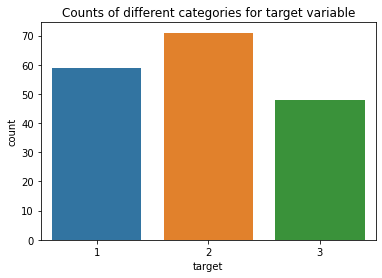

In [17]:
ax = sns.countplot(data = df_wine, x = 'target')
ax.set_title("Counts of different categories for target variable")

Text(0.5, 1.0, 'Distribution of alcohol variable with regard to different target classes')

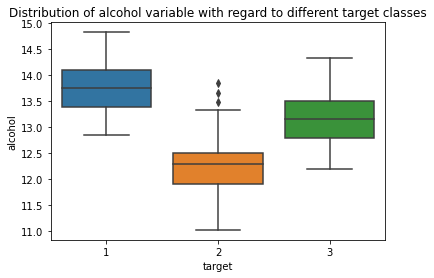

In [18]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'alcohol')
ax.set_title("Distribution of alcohol variable with regard to different target classes")

Text(0.5, 1.0, 'Distribution of malic acid variable with regard to different target classes')

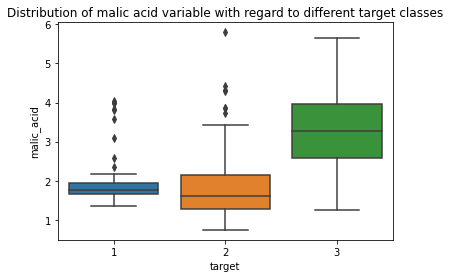

In [19]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'malic_acid')
ax.set_title("Distribution of malic acid variable with regard to different target classes")

Text(0.5, 1.0, 'Distribution of ash with regard to different target classes')

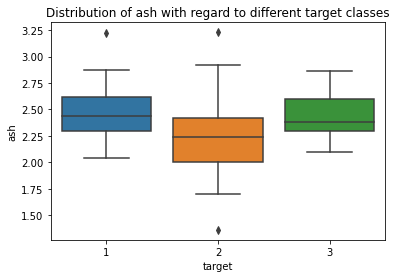

In [20]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'ash')
ax.set_title("Distribution of ash with regard to different target classes")

Text(0.5, 1.0, 'Distribution of alcalinity variable with regard to different target classes')

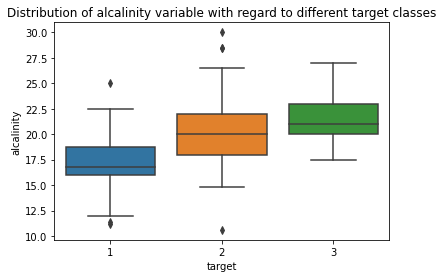

In [21]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'alcalinity')
ax.set_title("Distribution of alcalinity variable with regard to different target classes")

Text(0.5, 1.0, 'Distribution of Mg with regard to different target classes')

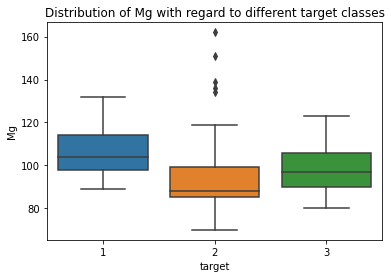

In [22]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'Mg')
ax.set_title("Distribution of Mg with regard to different target classes")

Text(0.5, 1.0, 'Distribution of total phenols with regard to different target classes')

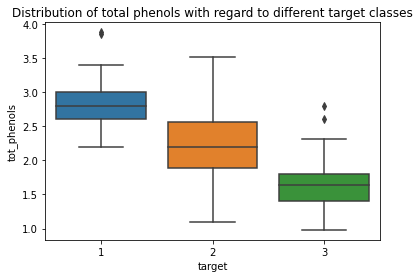

In [23]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'tot_phenols')
ax.set_title("Distribution of total phenols with regard to different target classes")

Text(0.5, 1.0, 'Distribution of flavanoids with regard to different target classes')

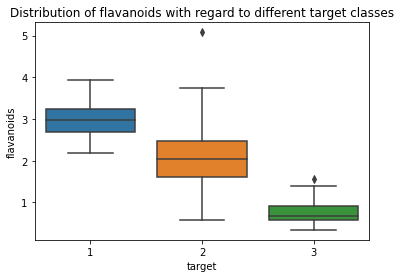

In [24]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'flavanoids')
ax.set_title("Distribution of flavanoids with regard to different target classes")

Text(0.5, 1.0, 'Distribution of non flavanoids phenols with regard to different target classes')

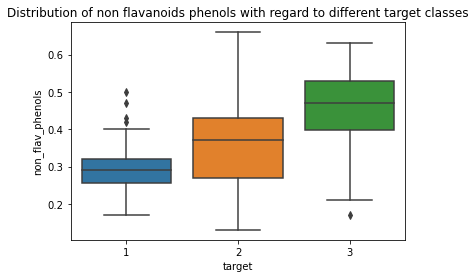

In [25]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'non_flav_phenols')
ax.set_title("Distribution of non flavanoids phenols with regard to different target classes")

Text(0.5, 1.0, 'Distribution of proanthocyanins with regard to different target classes')

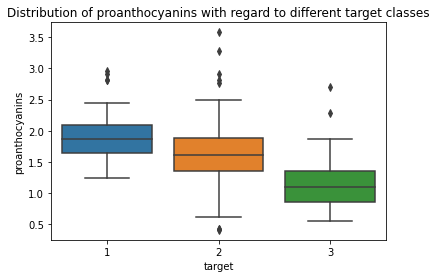

In [26]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'proanthocyanins')
ax.set_title("Distribution of proanthocyanins with regard to different target classes")

Text(0.5, 1.0, 'Distribution of color intensity with regard to different target classes')

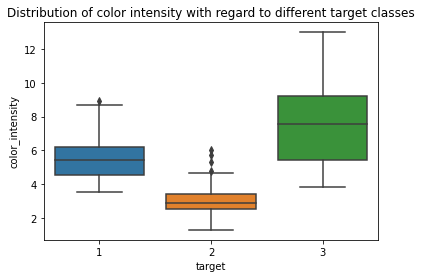

In [27]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'color_intensity')
ax.set_title("Distribution of color intensity with regard to different target classes")

Text(0.5, 1.0, 'Distribution of hue with regard to different target classes')

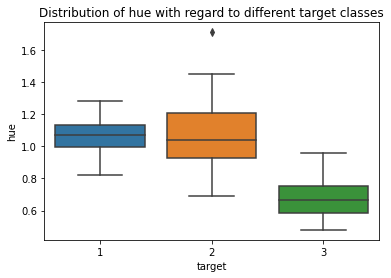

In [28]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'hue')
ax.set_title("Distribution of hue with regard to different target classes")

Text(0.5, 1.0, 'Distribution of OD with regard to different target classes')

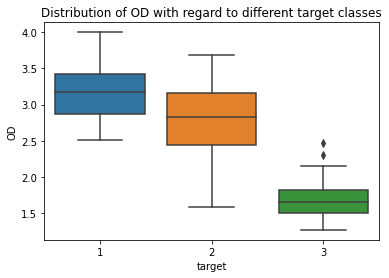

In [29]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'OD')
ax.set_title("Distribution of OD with regard to different target classes")

Text(0.5, 1.0, 'Distribution of proline with regard to different target classes')

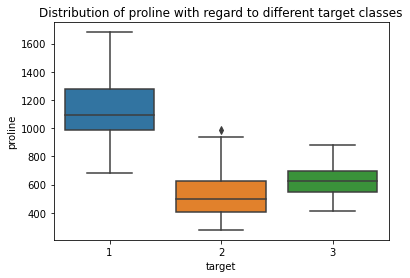

In [30]:
ax = sns.boxplot(data = df_wine, x = 'target', y = 'proline')
ax.set_title("Distribution of proline with regard to different target classes")

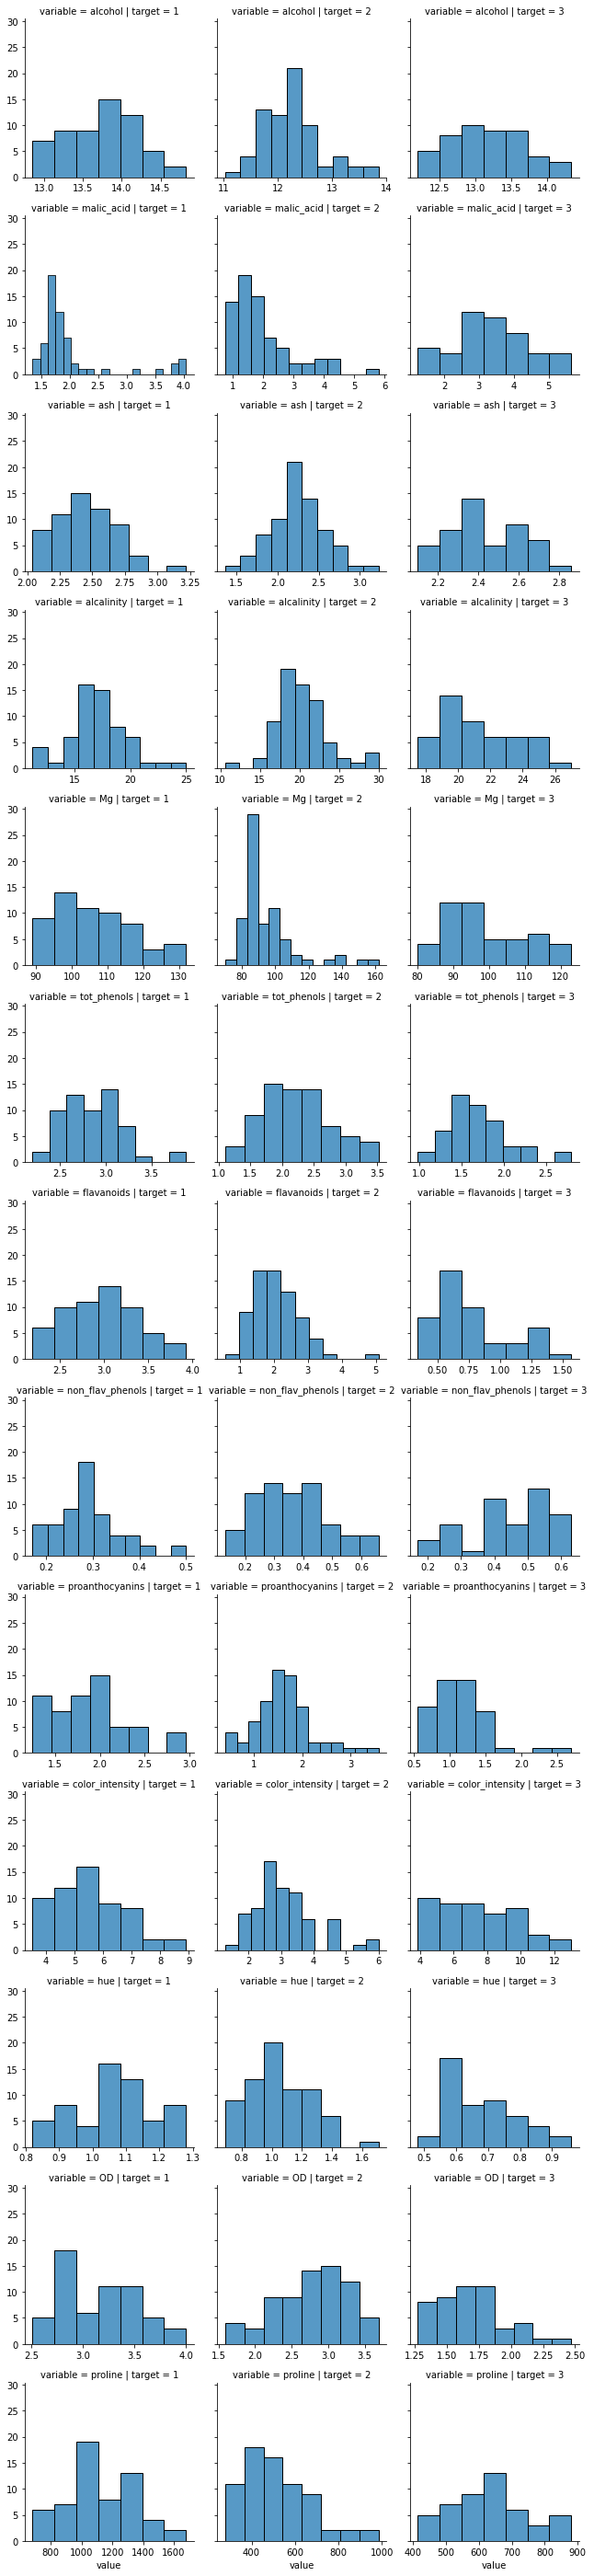

In [31]:
g = sns.FacetGrid(df_wine_melt, col= 'target',  row= 'variable', sharex = False)
g.map(sns.histplot, 'value')

**4b) [M] What is this heatmap conveying?**

Here is one I want you to include. I'll give it to you, and you need to study and interpret what it's conveying. The cell is provided.

<AxesSubplot:>

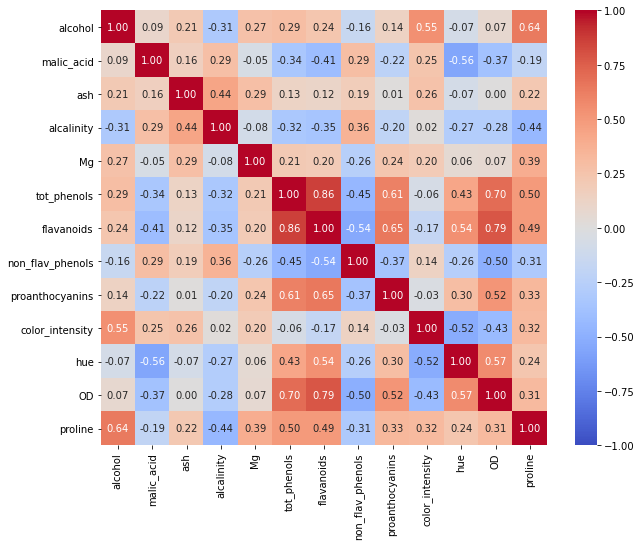

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_wine.corr(),
            center=0, vmin=-1, vmax=1, cmap="coolwarm",
            annot=True, fmt=".2f")

ANSWER:  
The heatmap shows the correlation among pairs of numerical variables (i.e color_intensity vs Mg). The heatmap is symmetric because of the symmetric property in comparisons, so practically we only need to look at either the lower half or the upper half of the matrix. The redder it is, the more positively correlated the pair of numerical variables is; the bluer it is, the more negatively correlated the pair of numerical variable is. If the color is light, almost white, then there should be no correlation between the two variables.  
In the heatmap, it is obvious that the diagonal should be all 1 because it is the correlation between a variable and itself. We also observe some good postive correlations. For example, flavanoids and total phenoids are positively correlated with a scale of 0.86. OD and flavanoids are positively correlated with a scale of 0.79  
We also observe some negative correlations. For example, hue and malic acidity are negatively correlated with a scale of -0.56; non-flavaphenols and flavanoids are negatively correlated with a scale of -0.54 (make sense).

**4c)** [M] Look up Seaborn's clustermap function. What is this conveying? Are there similarities to the previous heatmap? (This is a bit of a taste of our last topic we will cover on clustering data.) https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap

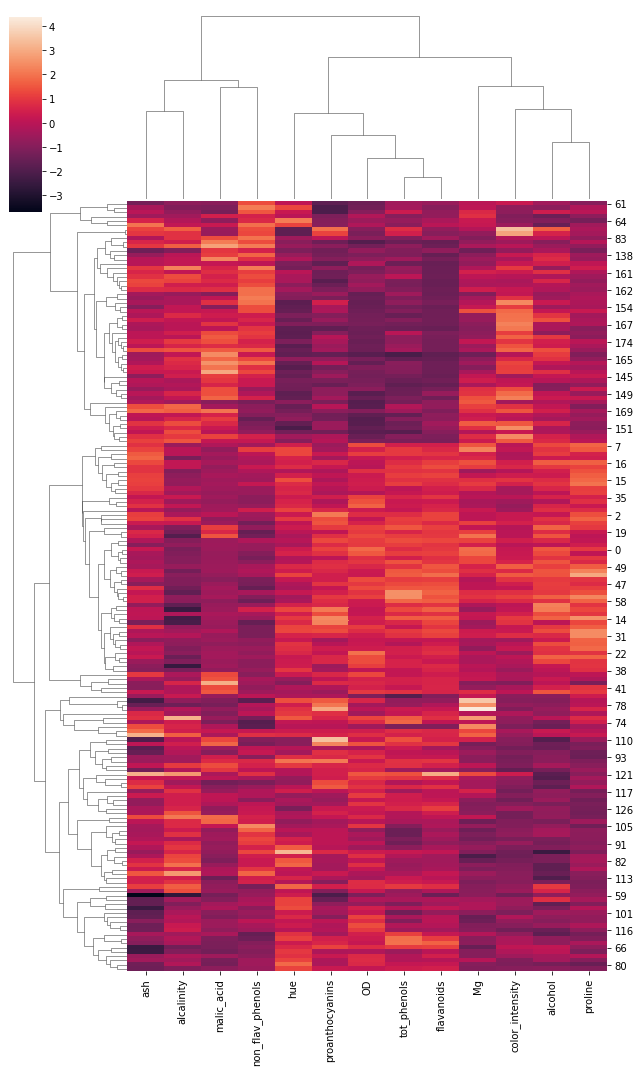

In [33]:
sns.clustermap(df_wine.iloc[:,1:],row_cluster=True,col_cluster=True,
               z_score=1,metric="correlation",
               figsize=(9,15))

ANSWER:  
The dendrograms show clustering of data. With the clustering, we can see that which observations should belong to a clustering. For example, observation 80 and observation 66 are close to each other, should be in a clustering, while 80 and 61 are far away, thus, should belong to different clustering. We can also see features clustering, features that have close correlations with each other. For example, flavanoids and total phenoids are two close features with the small height (reflecting small distance).  
The heat map reflects the values of each observation.

***
**5)**	Set up your `X` and `y` data frames to prepare for your modeling steps. Be sure to normalize your `X` variables. (Use z-score transform. Any approach will do, but `StandardScaler()` keeps in you the scikit-learn world.) Be sure to create a binarized version of `y` as well, called `y_bin` or `y_ohe`. Just don't delete the original `y`. Be sure you shuffle your data.

NOTE: You'll need both types of y. Some classifiers work great on single target variables that are multi-class such as these data. However, others do not. You'll needed the binarized variable for neural nets! Remember, binarization is important for classifiers such as neural nets when you are working with a target variable that is multi-class (i.e. more than two labels). 

In [34]:
# X: attributes y: target
X = df_wine.iloc[:, 1:]
y = df_wine.iloc[:, 0:1]

In [35]:
# z-score normalization
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [36]:
# shuffle
X, y = shuffle(X, y, random_state = 0)

In [37]:
# binarize
y_bin = pd.get_dummies(y)

***
**6a)** Let's induce a basic Decision Tree Classifier (i.e. `DecisionTreeClassifier()`). Don't set any initial parameters. Let the default tree induction parameters be used. Evaluate the tree using a 5-fold cross validation. Perform a standard report of your class-wide performance metrics (i.e. using classification report, but specify 3 significant digits instead of the default of 2). You should have all of this code completed from a previous lab.

What is the overall accuracy? Which class performs the best? The worst?

In [38]:
clf = DecisionTreeClassifier()
y_pred = cross_val_predict(clf, X, y, cv = 5)
print(classification_report(y, y_pred, digits = 3))

              precision    recall  f1-score   support

           1      0.932     0.932     0.932        59
           2      0.924     0.859     0.891        71
           3      0.868     0.958     0.911        48

    accuracy                          0.910       178
   macro avg      0.908     0.917     0.911       178
weighted avg      0.912     0.910     0.910       178



The overall accuracy is 91%. Class 2 has the worst recall while class 3 has the worst precision. Overall, if we look at the f1-score, which "averages" the performance of the class based on precision and recall, class 2 performes the worst with f1-score of 0.891, while class 1 performs the best with f1-score of 0.932

**6b)**	Try to run your code above a few different times. Your performance results should fluctuate a bit. Why?

ANSWER:  
Decision Tree has a tendency to overfit according to the training data, and in this case we have different fold of training sets are being used to build the Decision Tree model. Thus the results vary as the training data are different every run.

**6c)** For comparisons purposes, clearly print out what the value of your f1 score is using the function `f1_score` from `sklearn.metrics`. Do not copy and paste the values, but compute it using sklearn. 

In [39]:
from sklearn.metrics import f1_score
print(f"f1_score = {f1_score(y, y_pred, average = None)}")
print(f"Macro f1_score = {f1_score(y, y_pred, average = 'macro')}")
print(f"Weighted f1_score = {f1_score(y, y_pred, average = 'weighted')}")

f1_score = [0.93220339 0.89051095 0.91089109]
Macro f1_score = 0.9112018092815096
Weighted f1_score = 0.9098261216263512


***
## Our first hyperparameter search using decision trees

**7)**	As we learned, a decision tree has a lot of parameters. Likewise, the `DecisionTreeClassifier` class offers those parameters for you to affect your tree induction.

Let's introduce `GridSearchCV`, a fantastic framework to find good hyperparameters for your models. There are TWO important parameters to `GridSearchCV`:

- `estimator` – this is the model that you will evaluate, that implements the scikit-learn estimator interface (which is pretty much every model implemented in scikit-learn!)
- `param_grid` – this is a dictionary with parameters of your model as keys, and a list of values to test as the value of each key. Look at the page for DecisionTreeClassifier. 
- `scoring` - this one is pretty important. This specifies the score(s) you want to use to use to evaluate the performance the cross-validation model. So

For example: suppose we wanted to compare both measures of purity: `"gini"` and `"entropy"`. And, suppose we wanted to compare different `max_depth` values. We could set up a param_grid parameter:

```
param_grid = { 
  'criterion' : ['gini', 'entropy'], 
  'max_depth' : [3,4,5,6,7] 
}
```

This represents 10 different runs (2 different `criterion` * 5 `max_depth` values), times the size of your cross-validation. So, if we use a `cv` of 5, then `GridSearchCV` will be training, evaluating and validating 50 different decision trees!

Add the above `param_grid` dictionary, then copy the following into your code, paying close attention to the parameters (i.e. just don't copy code without understanding it!):

```
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    return_train_score=True, cv=5)
grid_result = grid.fit(X,y)
```

(If you did not use X and y, then you need to specify the variables you used here.) 

Execute your code. It should go ahead and evaluate all combinations of parameters you set up in your param_grid! Decision trees are pretty quick to learn, especially on small data sets such as this.

In [40]:
param_grid = { 
  'criterion' : ['gini', 'entropy'], 
  'max_depth' : [3,4,5,6,7] 
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    return_train_score=True, cv=5)
grid_result = grid.fit(X,y)

In [41]:
grid_result

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

***
**8)** Cool! Now, you need to explore the internal attributes of `grid_result`. It contains a LOT of information. Look closely at the description of the return value on the documentation page for `GridSearchCV`. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Then, show the best score, along with the best parameters for that score. (HINT: check out the attributes `best_score_` and `best_params_`)

In [42]:
# best score: Mean cross-validated score of the best_estimator
# best_estimator: Estimator that was chosen by the search
print(f"Best score for grid search: {grid_result.best_score_}")

Best score for grid search: 0.9274603174603175


In [43]:
# best_params_: return the best parameters for the decision tree
print(f"Best params for grid search: {grid_result.best_params_}")

Best params for grid search: {'criterion': 'entropy', 'max_depth': 3}


**9)** [M] What does the best "score" represent? What performance metric? How do you override it, if, for example, you want to use `f1_macro`?

Best score represents the mean score of the cross-validation process of the best estimator - model with best performance. By default, parameters search for the score function of the estimators to evaluate parameter settings (ref: https://scikit-learn.org/stable/modules/grid_search.html). For classification, it is <code>sklearn.metrics.accuracy_score</code>, which is an accuracy based scoring. If we want to override the performance metric, we can specify the parameter <code>scoring</code> in the GridSearchCV. 

ANSWER: 



***
**10)** Copy your `GridSearchCV` code above, but this time specify a `scoring` parameter of `"f1_macro"`. Be sure to store the results of fit again as `grid_result`, and print the best score and best parameters again

In [44]:
param_grid = { 
  'criterion' : ['gini', 'entropy'], 
  'max_depth' : [3,4,5,6,7] 
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    return_train_score=True, scoring = 'f1_macro', cv=5)
grid_result = grid.fit(X,y)

In [45]:
print(f"Best score for grid search: {grid_result.best_score_}")

Best score for grid search: 0.929321836874562


In [46]:
print(f"Best params for grid search: {grid_result.best_params_}")

Best params for grid search: {'criterion': 'entropy', 'max_depth': 6}


**10b)** Did your result improve by using the default decision tree above?

ANSWER:  
My best score actually does not improve, and it is even slightly worse than the first score (which I find a bit strange because I think f1_macro should be a better metric than just accuracy). My latter result also reports a different best params, with a tree of max_depth 6 instead of 3

***
**11)** Now, write the code to report the mean training and testing score and standard deviation for every parameter combination tested. Output your data in order of highest mean test score to lowest. How did you do compared to the default decision tree without any parameters? 

(HINT: Don't think hard about this. This is actually easily done by casting the `cv_results_` attribute of your grid result return into a `DataFrame`, and then using standard pandas data selection and sorting methods. The variables I'm asking for are provided as a result! Then you can just output the dataframe itself, but selecting only the columns of interest.)

In [47]:
df_grid_results = pd.DataFrame(grid_result.cv_results_)

##### Mean train score

In [48]:
df_grid_results.loc[:, ['params','mean_train_score']]

,params,mean_train_score
0,"{'criterion': 'gini', 'max_depth': 3}",0.984147
1,"{'criterion': 'gini', 'max_depth': 4}",0.992073
2,"{'criterion': 'gini', 'max_depth': 5}",0.997432
3,"{'criterion': 'gini', 'max_depth': 6}",1.000000
4,"{'criterion': 'gini', 'max_depth': 7}",1.000000
5,"{'criterion': 'entropy', 'max_depth': 3}",0.994804
6,"{'criterion': 'entropy', 'max_depth': 4}",0.998708
7,"{'criterion': 'entropy', 'max_depth': 5}",1.000000
8,"{'criterion': 'entropy', 'max_depth': 6}",1.000000
9,"{'criterion': 'entropy', 'max_depth': 7}",1.000000


##### Mean test score sorted

In [49]:
df_grid_results.loc[:, ['params','mean_test_score']].sort_values(by = 'mean_test_score', ascending = False)

,params,mean_test_score
8,"{'criterion': 'entropy', 'max_depth': 6}",0.929322
5,"{'criterion': 'entropy', 'max_depth': 3}",0.924416
9,"{'criterion': 'entropy', 'max_depth': 7}",0.923576
7,"{'criterion': 'entropy', 'max_depth': 5}",0.918126
4,"{'criterion': 'gini', 'max_depth': 7}",0.917806
1,"{'criterion': 'gini', 'max_depth': 4}",0.916012
2,"{'criterion': 'gini', 'max_depth': 5}",0.911068
6,"{'criterion': 'entropy', 'max_depth': 4}",0.908595
0,"{'criterion': 'gini', 'max_depth': 3}",0.894313
3,"{'criterion': 'gini', 'max_depth': 6}",0.886835


***
**12)** Now, run a more extensive grid search to see if you can get an even better decision tree. Use the following `param_grid` to get you started. 

```
param_grid = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : [4,5,6,7,8,9],
               'min_samples_split' : [3,4,5,6],
               'min_samples_leaf' : [1,2,3,4,5]
             }
```

Then, specify the following parameters for `GridSearchCV`:
- A higher number of partitions for cross-validation will give you a better, more exhaustive performance assessment. Use `cv=10` this time
- You can have multiple scoring metrics assessed. Let's record both accuracy and f1. Use `scoring=["accuracy","f1_macro"]`
- When you have multiple metrics, you must specify the `refit` parameter. Why? Scikit-learn retrains the final model returned with the entire dataset using the best measure specified with this parameter. The best parameters will be determined by "f1_macro". Thus, set `refit="f1_macro"`


Finally, once you retrieve the results, report the number of total runs, and the best result and its parameter. 

**That parameter grid will results in 240 different trees being assessed, each with 10-fold cross validation, for a total of 2400 trees being independently built! For some older machines, this could take a a minute or so.**

>Try to experiment with `n_jobs` as well! Most of your computers have multiple cores in the CPU. Take advantage of it, especially when you have this many runs! Observe the %%time magic command output in the cell to see if it actually makes a difference with your time to wait.


In [50]:
%%time
#Extra stuff....
param_grid = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : [4,5,6,7,8,9],
               'min_samples_split' : [3,4,5,6],
               'min_samples_leaf' : [1,2,3,4,5]
             }
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    return_train_score=True, scoring = ['accuracy', 'f1_macro'], cv=10, refit = 'f1_macro', n_jobs = 2)
grid_result = grid.fit(X,y)

Wall time: 10.2 s


Let's case this into a data frame...

In [51]:
df_grid_results = pd.DataFrame(grid_result.cv_results_)

In [52]:
print(f"Best score for grid search: {grid_result.best_score_}")

Best score for grid search: 0.9599037999037998


In [53]:
print(f"Best params for grid search: {grid_result.best_params_}")

Best params for grid search: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [54]:
acc = df_grid_results.loc[:, ['params','mean_test_accuracy']].sort_values(by = 'mean_test_accuracy', ascending = False).head(5)
print(acc)
print(f"Best accuracy model: {acc.iloc[0,0]}")

                                                params  mean_test_accuracy
122  {'criterion': 'entropy', 'max_depth': 4, 'min_...            0.960784
142  {'criterion': 'entropy', 'max_depth': 5, 'min_...            0.960784
201  {'criterion': 'entropy', 'max_depth': 8, 'min_...            0.955229
121  {'criterion': 'entropy', 'max_depth': 4, 'min_...            0.955229
181  {'criterion': 'entropy', 'max_depth': 7, 'min_...            0.955229
Best accuracy model: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [55]:
f1 = df_grid_results.loc[:, ['params','mean_train_f1_macro']].sort_values(by = 'mean_train_f1_macro', ascending = False).head(5)
print(f1)
print(f"Best f1_macro model (train): {acc.iloc[0,0]}")

                                                params  mean_train_f1_macro
120  {'criterion': 'entropy', 'max_depth': 4, 'min_...                  1.0
180  {'criterion': 'entropy', 'max_depth': 7, 'min_...                  1.0
220  {'criterion': 'entropy', 'max_depth': 9, 'min_...                  1.0
200  {'criterion': 'entropy', 'max_depth': 8, 'min_...                  1.0
140  {'criterion': 'entropy', 'max_depth': 5, 'min_...                  1.0
Best f1_macro model (train): {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [56]:
f1 = df_grid_results.loc[:, ['params','mean_test_f1_macro']].sort_values(by = 'mean_test_f1_macro', ascending = False).head(5)
print(f1)
print(f"Best f1_macro model (test): {acc.iloc[0,0]}")

                                                params  mean_test_f1_macro
122  {'criterion': 'entropy', 'max_depth': 4, 'min_...            0.959904
142  {'criterion': 'entropy', 'max_depth': 5, 'min_...            0.959283
140  {'criterion': 'entropy', 'max_depth': 5, 'min_...            0.954900
121  {'criterion': 'entropy', 'max_depth': 4, 'min_...            0.954776
161  {'criterion': 'entropy', 'max_depth': 6, 'min_...            0.954776
Best f1_macro model (test): {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


**13)**	[M] Discuss your findings. And, go back and re-run the experiment, but use 5-fold this time. You might very well find that the preformance results are better with 10-fold. Why do you think this is? And, did the additional parameters make a difference? Output the top 5 parameter configurations, along with the training and testing, sorted by f1_macro. 

We obtain the best parameters for the Decision Tree Classifier to be {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}, with the best score of 0.9599 (f1_score) and accuracy of 0.9608

##### 5-fold 

In [57]:
%%time
#Extra stuff....
param_grid = { 'criterion' : ['gini', 'entropy'],
               'max_depth' : [4,5,6,7,8,9],
               'min_samples_split' : [3,4,5,6],
               'min_samples_leaf' : [1,2,3,4,5]
             }
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, 
                    return_train_score=True, scoring = ['accuracy', 'f1_macro'], cv=5, refit = 'f1_macro', n_jobs = 2)
grid_result = grid.fit(X,y)

Wall time: 4.2 s


In [58]:
df_grid_results = pd.DataFrame(grid_result.cv_results_)

The performance is better with 10-fold because it provides more training data for the decision tree. Our data is big enough to use 10-fold. With more folds, we will have more training observations and avoid overfitting to just a smaller dataset, which decision tree tends to do.

In [59]:
f1 = df_grid_results.loc[:, ['params','mean_train_f1_macro']].sort_values(by = 'mean_train_f1_macro', ascending = False).head(5)
print(f1)
print("Best models - train")
for i in range(5):
    print(f"{acc.iloc[i,0]}")

                                                params  mean_train_f1_macro
120  {'criterion': 'entropy', 'max_depth': 4, 'min_...             0.998708
180  {'criterion': 'entropy', 'max_depth': 7, 'min_...             0.998708
40   {'criterion': 'gini', 'max_depth': 6, 'min_sam...             0.998708
80   {'criterion': 'gini', 'max_depth': 8, 'min_sam...             0.998708
81   {'criterion': 'gini', 'max_depth': 8, 'min_sam...             0.998708
Best models - train
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [60]:
f1 = df_grid_results.loc[:, ['params','mean_test_f1_macro']].sort_values(by = 'mean_test_f1_macro', ascending = False).head(5)
print(f1)
print("Best models - test")
for i in range(5):
    print(f"{acc.iloc[i,0]}")

                                                params  mean_test_f1_macro
142  {'criterion': 'entropy', 'max_depth': 5, 'min_...            0.945052
141  {'criterion': 'entropy', 'max_depth': 5, 'min_...            0.934773
180  {'criterion': 'entropy', 'max_depth': 7, 'min_...            0.934407
203  {'criterion': 'entropy', 'max_depth': 8, 'min_...            0.933495
143  {'criterion': 'entropy', 'max_depth': 5, 'min_...            0.929447
Best models - test
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}


***
### Reflecting on parallel processing and grid search

Hopefully you tried out `n_jobs=2`. Also, I sometimes set `pre_dispatch` to the same number as `n_jobs`, just to control too much memory usage. Not really important for decision trees, but could be important for larger models. If you have a really juicy machine, try an even higher value of `n_jobs`. (NOTE: Don't go higher than the number of cores in your machine as you will actually slow down quite a bit from too much OS context switching (you'll learn about this from CSCI 315 if you haven't already.) Experiment by starting with only `n_jobs=2`, and incrementally increase. NOTE: Parallel jobs for large models such as neural nets can sometimes fail with a memory error. If this happens, just run with n_jobs=1.)

Depending on the number of parameters you choose, and the cv value, and most importantly, the model, this can take an extraordinarily long time! Like, seriously long. Like, if you are not careful, you could be waiting days for results! Serious grid search for hyperparameter tuning is typically very CPU intensive (and memory intensive for large datasets.) **So, ALWAYS START SIMPLE FIRST!** Use only a few parameters to explore, with few values, and a small CV number to start with. With neural nets, choose a small number of epochs to begin. Why? **Confirm you are getting decent results first!** Then, let your obsessive side kick into high gear, set your system to evaluate many different parameters, and then typically, you go to bed.

***
**14)** OK. Now on to hyperparameter tuning for Keras. (CONSIDER YOURSELF WARNED! Neural nets take a long time to train compared to decision trees!) From the previous lab, copy over your code for the function `create_keras_model()`. Now, modify your base neural net structure to match the inputs and outputs for the wine dataset you are working on for this lab.

Once you do that, modify your function to take parameters, specifically pointing to parameters that you want to explore with `GridSearchCV`. That is the only way to get the parameters into a scikit-learn Keras-wrapped model. In particular, you are going to want to evaluate different optimizer and activation values for the hidden layer, and vary the number of hidden units. (Eventually you'll want to mess with SGD and momentum, but keep it simple for now!) Modify your function to take these three additional parameters. You may name the parameters whatever you want, though generally it's good to keep them the same as the actual parameters used as you build your model.

I suggest setting up the following parameters:

* `optimizer` (with a default of `adam`)
* `num_hidden` - representing the number of hidden nodes in the middle layer, set a default of 10
* `activation` - the activation function you want to use on the middle layer

(Of course, you can explore further and create deeper multilayer structures! We're just starting with the essentials.)

Here's what my function looks like. You can copy it over to get you started.

```
def create_keras_model(optimizer='adam', num_hidden=10, activation='relu'):

    # wine has 13 predictor variables
    inputs = Input(shape=(13,))
    
    # our hidden layer is parameterized
    layer = Dense(num_hidden, activation=activation)(inputs)
    
    # we have a 3-class problem, and we'll hard-code softmax activation
    outputs = Dense(3,activation="softmax")(layer)
    
    # Build our model
    model = Model(inputs=inputs, outputs=outputs, name="keras model")

    # Compile and return the fucker
    model.compile(optimizer=optimizer, 
                  loss="categorical_crossentropy", 
                  metrics=["accuracy"])
    return model
```

I suggest you use my function to get you started. Copy it into your cell below. Then, create your Keras classifier with KerasClassifier(). When you call this function, this is where you pass parameters such as epochs and batch_size. Remember, we're starting simple! NEVER jump right into a GridSearch until you've got your model function working properly. You don't want to wait long, so just use epochs=5  and a batch_size=4. (I would advise starting with verbose=1, just to make sure your model is training properly, and you notice the accuracy increasing and loss decreasing, then set verbose=0 when doing a bigger grid search on the next step.) 

```
clf = KerasClassifier(build_fn=create_keras_model, verbose=1, epochs=5, batch_size=4)
```

> NOTE - the parameters in our `create_keras_model` function are for use with GridSearchCV, not for our first step using `cross_val_predict`. This is why we're hard-coding default values.

Finally, test out your `KerasClassifier()` instance with the `cross_val_predict()` method you learned about in the previous lab, and print the results of classification_report. You can try to vary some parameters if you want, but don't spend a lot of time here.

In [66]:
def create_keras_model(optimizer='adam', num_hidden=10, activation='relu'):

    # wine has 13 predictor variables
    inputs = Input(shape=(13,))
    
    # our hidden layer is parameterized
    layer = Dense(num_hidden, activation=activation)(inputs)
    
    # we have a 3-class problem, and we'll hard-code softmax activation
    outputs = Dense(3,activation="softmax")(layer)
    
    # Build our model
    model = Model(inputs=inputs, outputs=outputs, name="keras_model")

    # Compile and return the fucker --- ...
    model.compile(optimizer=optimizer, 
                  loss="categorical_crossentropy", 
                  metrics=["accuracy"])
    return model

In [82]:
clf = KerasClassifier(model=create_keras_model, verbose=1, epochs=5, batch_size=4, activation = 'relu')

In [83]:
y_pred = cross_val_predict(clf, X, y_bin, cv = 5)
print(classification_report(y_bin, y_pred, digits = 3))

Epoch 1/5
36/36 [==============================] - 0s 883us/step - loss: 1.2204 - accuracy: 0.4679
Epoch 2/5
36/36 [==============================] - 0s 997us/step - loss: 1.1815 - accuracy: 0.4993
Epoch 3/5
36/36 [==============================] - 0s 997us/step - loss: 0.9896 - accuracy: 0.6654
Epoch 4/5
36/36 [==============================] - 0s 1ms/step - loss: 0.9259 - accuracy: 0.7174
Epoch 5/5
9/9 [==============================] - 0s 748us/step
Epoch 1/5
36/36 [==============================] - 1s 2ms/step - loss: 1.4975 - accuracy: 0.1800
Epoch 2/5
36/36 [==============================] - 0s 1ms/step - loss: 1.1292 - accuracy: 0.3736
Epoch 3/5
36/36 [==============================] - 0s 826us/step - loss: 0.9919 - accuracy: 0.4391
Epoch 4/5
36/36 [==============================] - 0s 769us/step - loss: 0.8299 - accuracy: 0.5694
Epoch 5/5
9/9 [==============================] - 0s 873us/step
Epoch 1/5
36/36 [==============================] - 0s 911us/step - loss: 1.3465 - accura

***
**15)** Ok, you've verified that you have a good model function that you can explore. Now, it's time to use GridSearchCV on Keras (and prepare to wait several minutes or more!) 

First, create a `param_grid` dictionary. You must, minimally, specify the following keys: 
-	`optimizer : ['adam','sgd']`
-	number of hidden units : 2 different numbers of your choice
-	`'activation' : ['relu']`
-	`'epochs' : [5, 10]`
-	`'batch_size' : [4, 8]`

Create a new classifier, but be sure verbose=0. Then, just like you did with the decision tree, wrap that classifier model in a GridSearchCV instance. Use a cross validation of 5 (though you can try more if you want.) Report your best model hyperparameters  

When you create your `GridSearchCV` object, be sure to set `verbose=2`. That way you'll get some output to know what is being done.

You should get some pretty good results!

In [85]:
%%time
param_grid = {
    'optimizer' : ['adam', 'sgd'],
#     'activation' : ['relu'], Error: ValueError: Invalid parameter activation for estimator KerasClassifier. 
#     I tried to include activation in the constructor but it does not work.
    'epochs' : [5, 10],
    'batch_size' : [4, 8]
}
clf = KerasClassifier(model=create_keras_model, verbose=0, epochs=5, batch_size=4)
grid = GridSearchCV(clf, param_grid, 
                    return_train_score=True, scoring = ['accuracy', 'f1_macro'], cv=5, refit = 'f1_macro', n_jobs = 2, verbose = 2)
grid_result = grid.fit(X,y_bin)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   18.7s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   19.5s finished


Wall time: 20.3 s


In [86]:
df_grid_results = pd.DataFrame(grid_result.cv_results_)

In [87]:
f1 = df_grid_results.loc[:, ['params','mean_test_f1_macro']].sort_values(by = 'mean_test_f1_macro', ascending = False).head(5)
print(f1)
print("------Best models - test dataset")
for i in range(5):
    print(f"{f1.iloc[i,0]}")

                                              params  mean_test_f1_macro
2  {'batch_size': 4, 'epochs': 10, 'optimizer': '...            0.936642
6  {'batch_size': 8, 'epochs': 10, 'optimizer': '...            0.916657
3  {'batch_size': 4, 'epochs': 10, 'optimizer': '...            0.886729
1  {'batch_size': 4, 'epochs': 5, 'optimizer': 's...            0.796927
5  {'batch_size': 8, 'epochs': 5, 'optimizer': 's...            0.770038
------Best models - test dataset
{'batch_size': 4, 'epochs': 10, 'optimizer': 'adam'}
{'batch_size': 8, 'epochs': 10, 'optimizer': 'adam'}
{'batch_size': 4, 'epochs': 10, 'optimizer': 'sgd'}
{'batch_size': 4, 'epochs': 5, 'optimizer': 'sgd'}
{'batch_size': 8, 'epochs': 5, 'optimizer': 'sgd'}


**16)** Study your results. Can you do even better? How close can you get to 100% accuracy on a 5- or 10-fold cross validation with Keras? Try a different activation… say… `tanh`. You'll likely need more epochs. Perhaps a few more hidden units? A bit larger batch size, but more epochs? Can you use the sgd optimizer? Play with the learning rate and momentum? Many models perform the same, but you'll notice dramatic differences in the time taken to fit the model, which is quite interesting and informative! See what happens…. 

In [89]:
%%time
param_grid = {
    'optimizer' : ['adam', 'sgd'],
#     'activation' : ['relu'],
    'epochs' : [5, 10, 15],
    'batch_size' : [4, 8, 12]
}
clf = KerasClassifier(build_fn=create_keras_model, verbose=0, epochs=5, batch_size=4)
grid = GridSearchCV(clf, param_grid, 
                    return_train_score=True, scoring = ['accuracy', 'f1_macro'], cv=5, refit = 'f1_macro', n_jobs = 2, verbose = 2)
grid_result = grid.fit(X,y_bin)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   16.3s
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:   35.8s finished
D:\_work\coding\anaconda\envs\csci349\lib\site-packages\scikeras\wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Wall time: 36.7 s


In [90]:
#summarize results
df_grid_results = pd.DataFrame(grid_result.cv_results_)
f1 = df_grid_results.loc[:, ['params','mean_test_f1_macro']].sort_values(by = 'mean_test_f1_macro', ascending = False).head(5)
print(f1)
print("------Best models - test dataset")
for i in range(5):
    print(f"{f1.iloc[i,0]}")

                                               params  mean_test_f1_macro
4   {'batch_size': 4, 'epochs': 15, 'optimizer': '...            0.973388
5   {'batch_size': 4, 'epochs': 15, 'optimizer': '...            0.932951
3   {'batch_size': 4, 'epochs': 10, 'optimizer': '...            0.925704
2   {'batch_size': 4, 'epochs': 10, 'optimizer': '...            0.912886
10  {'batch_size': 8, 'epochs': 15, 'optimizer': '...            0.908834
------Best models - test dataset
{'batch_size': 4, 'epochs': 15, 'optimizer': 'adam'}
{'batch_size': 4, 'epochs': 15, 'optimizer': 'sgd'}
{'batch_size': 4, 'epochs': 10, 'optimizer': 'sgd'}
{'batch_size': 4, 'epochs': 10, 'optimizer': 'adam'}
{'batch_size': 8, 'epochs': 15, 'optimizer': 'adam'}


In [91]:
# More epochs definitely works better.